# ECE 4950 Assignment 6 

## Coding (Support Vector Machines): Digit classification using SVM 

We consider hand written digit recognition, MNIST. Please visit http://yann.lecun.com/exdb/mnist/ for more information about the original MNIST dataset.

In this competition, you will be given images of hand written digits. Each image is grayscale, and 28 by 28 pixels. Your goal is to design a classifier for this problem (output digits from 0 to 9).

Make sure you have installed the package scikit-image:

``
    pip3 install scikit-image
``

or 


``
    conda install scikit-image
``

You can use the following script to load data.

In [2]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
data_path = "./mnist.mat"
data_raw = loadmat(data_path)
images = data_raw['data'].T
label = data_raw['label'][0]

Data will be an array of 70000 784-length numpy arrays. 50000 of them will be the training data and 20000 of them will be the testing data. The corresponding labels of training data are also provided. 

Each vector represents an image of size $28 \times 28$. The original black and white images were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field. 

You can reshape each vector to be an $28 \times 28$ matrix and plot the image using the following script. Typical images will look like the following:

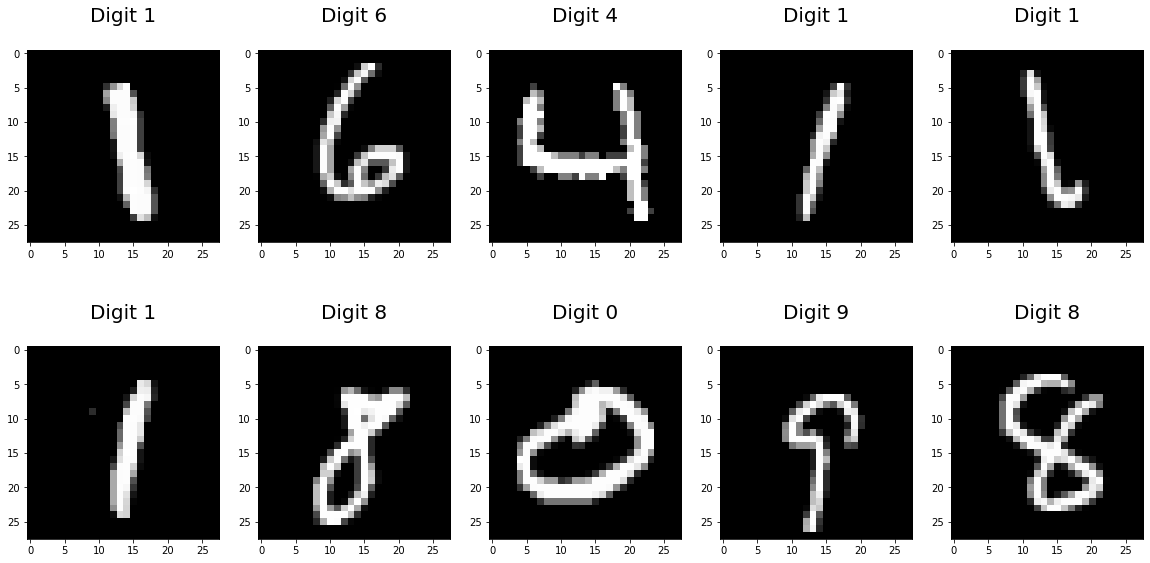

In [3]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(20,10))
for i in range(10,20):
    plt.subplot(2, 5, i-9)
    t = random.randint(0,70000)
    plt.imshow(np.reshape(images[t,:], (28,28)), cmap = plt.cm.gray)
    plt.title('Digit %i\n' %label[t], fontsize = 20)

### Sampling, Normalization and Data splitting

To make training faster, we only take 10% of the data randomly. Then we further reduce the dimension of the data by taking the average of each  Then we split the data into training and testing set and normalize them by max norm.

In [4]:
from sklearn.model_selection import train_test_split
X_new, X_unused, Y_new, Y_unused = train_test_split(images, label, test_size = 0.9, random_state = 1000)
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_new, Y_new, test_size = 0.3, random_state = 1000) # split the dataset into training and testing sets
X_trn = X_trn/256
X_tst = X_tst/256

### Image Rescaling
To make the training even faster. The next code block rescale all the images by reducing the height and width of the image both by half. We make each $2\time 2$ block in the orginal image into a single pixel in the new image. The resulting value of the pixels in the new image will be the average of the original four pixels.

Then we get new images with $14 \times 14$ in size and stores in the rows of X_trn_new and X_tst_new.

In [5]:
from skimage.transform import rescale, resize, downscale_local_mean
m, n = X_trn.shape
n_new = n//4
X_trn_new = np.zeros((m,n_new))
for i in range(m):
    image = np.reshape(X_trn[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_trn_new[i,:] = np.reshape(image_rescaled, n_new)

m2 = X_tst.shape[0]
X_tst_new = np.zeros((m2,n_new))
for i in range(m2):
    image = np.reshape(X_tst[i,:], (28,28))
    image_rescaled = rescale(image, 1.0 / 2.0, anti_aliasing=False)
    X_tst_new[i,:] = np.reshape(image_rescaled, n_new)
    
print('The new training set has size: '+ str(X_trn_new.shape))
print('The new testing set has size: '+ str(X_tst_new.shape))

/Applications/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


The new training set has size: (4900, 196)
The new testing set has size: (2100, 196)


## 1. Linear SVM
Run a linear SVM for the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for linear SVM?

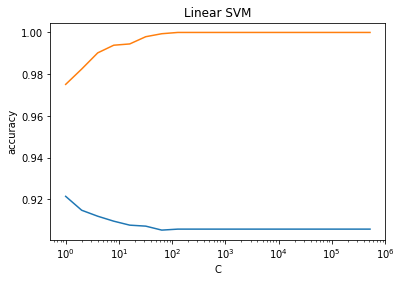

The maximum testing accuracy achieved with Linear SVM is: 1.0


In [6]:
from sklearn.svm import SVC
n = np.array(range(20))
C = 2**n
accuracy_tst = []
accuracy_trn = []
#========Your Code Here============
for c in C:
    # Create a classifier: a support vector classifier
    clf = SVC(C=c, gamma='auto', kernel='linear')
    # We learn the digits on the first half of the digits
    clf.fit(X_trn_new, Y_trn)
    # Now calculate accuracy
    acc = clf.score(X_tst_new, Y_tst)
    accuracy_tst.append(acc)
    acc = clf.score(X_trn_new, Y_trn)
    accuracy_trn.append(acc)
max_acc = np.amax(accuracy_trn)
#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("Linear SVM")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with Linear SVM is: ' + str(max_acc))

1. Explain how the accuracy changes with repect to penalty parameter  𝐶 (describe the underfitting and overfitting phenomenon).<br>
When C increases, the training accuracy decreases and the testing accuracy increases. This means that with larger C, the model escape from overfitting.<br>

2. What is the maximum testing accruracy achieved among all penalty parameters for linear SVM?<br> 1.0

## 2. Polynomial SVM
Run an SVM with polynomial kernal of degree $2, 3, 4$ with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for SVM with polynomial kernal of each degree? Compare it with linear SVM and explain.

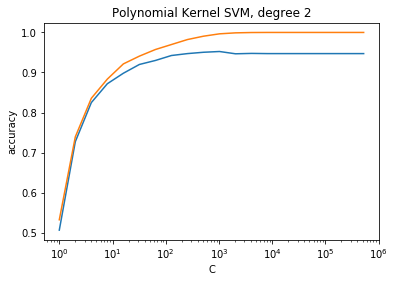

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 2 is: 1.0


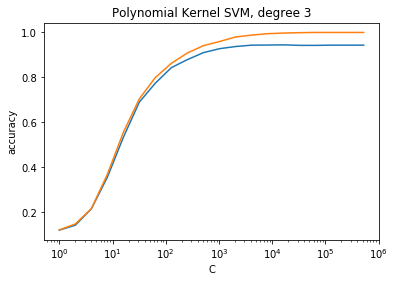

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 3 is: 1.0


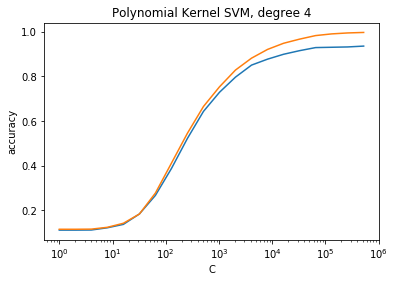

The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 4 is: 0.996938775510204


In [7]:
from sklearn.svm import SVC
D = [2, 3, 4]
n = np.array(range(20))
C = 2**n
max_acc = np.zeros(3)
for i in range(3):
    accuracy_tst = []
    accuracy_trn = []
    d = D[i]
    #========Your Code Here============
    for c in C:
        # Create a classifier: a support vector classifier
        clf = SVC(C=c, gamma='auto', degree=d, kernel='poly')
        # We learn the digits on the first half of the digits
        clf.fit(X_trn_new, Y_trn)
        # Now calculate accuracy
        acc = clf.score(X_tst_new, Y_tst)
        accuracy_tst.append(acc)
        acc = clf.score(X_trn_new, Y_trn)
        accuracy_trn.append(acc)
    max_acc[i] = np.amax(accuracy_trn)

    #=============================
    plt.semilogx(C, accuracy_tst)
    plt.semilogx(C, accuracy_trn)
    plt.title("Polynomial Kernel SVM, degree %i" %d)
    plt.xlabel('C')
    plt.ylabel('accuracy')
    plt.show()
    print('The maximum testing accuracy achieved with Polynomial Kernel SVM of degree ' + str(d) + ' is: ' + str(max_acc[i]))

1. Explain how the accuracy changes with repect to penalty parameter  𝐶 (describe the underfitting and overfitting phenomenon).<br>
When C increases, both the training and testing accuracy increase. But the curve with degree = 2 saturated at C = 10, that with degree = 3 saturated at 1000, and that with degree = 4 saturated more than 10^6. This means that models with higher dimension need larger C because they are easy to overfitting and need greater penalty.<br>

2. What is the maximum testing accruracy achieved among all penalty parameters for SVM with polynomial kernal of each degree? Compare it with linear SVM and explain.<br> 
The maximum testing accuracy achieved with Polynomial Kernel SVM of degree 2, 3, and 4 are: 1.0, 1.0, 0.9969. <br>
For the polynomial Kernel SVM of degree 4, the accuracy is not 1 comparing to that of degree 2 and 3. This could because the dimension of hyperplane is so high that the model is easy to be overfitting. This is obvious by observing the minimum C the model need to get accuracy 1.0. The higher the dimension is, the bigger C it needs. Note that linear kernel SVM needs min C around 1000. 

## 3. SVM with Gaussian Kernal.
Run an SVM with Gaussian kernal with the penalty parameter $$C \in \{2^i: i = 0, 1, ..., 19\}$$, and plot the training and testing accuracy as a function of $log C$ (semi-log plot).

Explain how the accuracy changes with repect to penalty parameter $C$ (describe the underfitting and overfitting phenomenon). 

What is the maximum testing accruracy achieved among all penalty parameters for SVM with Gaussian kernal of each degree? Compare it with linear SVM and polynomial SVM and explain.

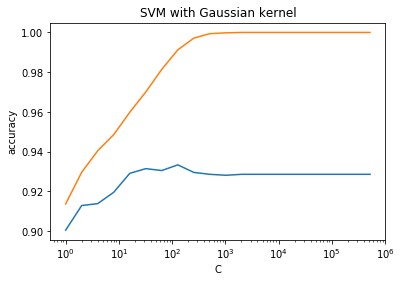

The maximum testing accuracy achieved with SVM with Gaussian kernel is: 1.0


In [32]:
from sklearn.svm import SVC
accuracy_tst = []
accuracy_trn = []
n = np.array(range(20))
C = 2**n
#========Your Code Here============
for c in C:
    # Create a classifier: a support vector classifier
    clf = SVC(C=c, gamma='auto', kernel='rbf')
    # We learn the digits on the first half of the digits
    clf.fit(X_trn_new, Y_trn)
    # Now calculate accuracy
    acc = clf.score(X_tst_new, Y_tst)
    accuracy_tst.append(acc)
    acc = clf.score(X_trn_new, Y_trn)
    accuracy_trn.append(acc)
max_acc = np.amax(accuracy_trn)

#=============================
plt.semilogx(C, accuracy_tst)
plt.semilogx(C, accuracy_trn)
plt.title("SVM with Gaussian kernel")
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()
print('The maximum testing accuracy achieved with SVM with Gaussian kernel is: ' + str(max_acc))

1. Explain how the accuracy changes with repect to penalty parameter  𝐶 (describe the underfitting and overfitting phenomenon).<br>
Overall, when C increases, the training and testing accuracy increases and saturated in the end. But the training accuracy decreases and the testing accuracy increases when C is around 100. This means that in this place, with the given larger C, the model escape from overfitting.<br>

2. What is the maximum testing accruracy achieved among all penalty parameters for SVM with Gaussian kernal? Compare it with linear SVM and polynomial SVM and explain.<br> 
1.0. The testing and training accuracy using Gaussian are better than that of polynomial kernel. Since the accuracy is in range of 0.9 to 1.0 while the latter is in range of 0 to 1.0. The min C to achieve 1.0 accuracy for Gaussian is less than that for polynomial kernel. But it is larger than that for linear kernel.